# Naive Bayes for text classification

Example to detect spam sms
<BR> This exercise makes use of frequent text processes when using a NB model

### Read data: a known repository of sms spam data

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# ! pip install requests
import requests 
import zipfile
import pandas as pd

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip'
data_file = 'SMSSpamCollection'

# Make request
resp = requests.get(url)

# Get filename
filename = url.split('/')[-1]

# Download zipfile
with open(filename, 'wb') as f:
  f.write(resp.content)

# Extract Zip
with zipfile.ZipFile(filename, 'r') as zip:
  zip.extractall('')

# Read Dataset
data = pd.read_table(data_file, 
                     header = 0,
                     names = ['type', 'message']
                     )

# Show dataset
data

,type,message
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...
...,...,...
5566,spam,This is the 2nd time we have tried 2 contact u...
5567,ham,Will ü b going to esplanade fr home?
5568,ham,"Pity, * was in mood for that. So...any other s..."
5569,ham,The guy did some bitching but I acted like i'd...


#### Install the language toolkit for the text processes and everything else necessary

In [3]:
# NLTK: Natural Language Toolkit
# !pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.stem.porter import *
from nltk.tokenize import RegexpTokenizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SLO\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SLO\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


**1st step: Tokenization**. <BR> It consists of separating the messages into words in order to be able to treat each. <BR>
At the same time, we remove punctuation (thanks to the RegexpTokenizer function)

In [4]:
# Tokenize: create words from sentences, and removes punctuation
tokenizer = RegexpTokenizer(r'\w+')
data['tokens'] = data.apply(lambda x: tokenizer.tokenize(x['message']), axis = 1)
data

,type,message,tokens
0,ham,Ok lar... Joking wif u oni...,"[Ok, lar, Joking, wif, u, oni]"
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
2,ham,U dun say so early hor... U c already then say...,"[U, dun, say, so, early, hor, U, c, already, t..."
3,ham,"Nah I don't think he goes to usf, he lives aro...","[Nah, I, don, t, think, he, goes, to, usf, he,..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...,"[FreeMsg, Hey, there, darling, it, s, been, 3,..."
...,...,...,...
5566,spam,This is the 2nd time we have tried 2 contact u...,"[This, is, the, 2nd, time, we, have, tried, 2,..."
5567,ham,Will ü b going to esplanade fr home?,"[Will, ü, b, going, to, esplanade, fr, home]"
5568,ham,"Pity, * was in mood for that. So...any other s...","[Pity, was, in, mood, for, that, So, any, othe..."
5569,ham,The guy did some bitching but I acted like i'd...,"[The, guy, did, some, bitching, but, I, acted,..."


**2nd step: Elimination of stop words**: <BR>Elimination of words that normally do not add value (prepositions, conjunctions, etc.), only noise (there are exceptions, though) <BR> This is done to reduce size of our dataset (already large). 
<BR> There are many sources of stopwords in Python, for English language, Spacy has 326 words, Gensim 337, Scikit-learn 318, NLTK library, 179. 
<BR> More or less words is not better in itself, you need to read them and assess whether you want to include or remove some

In [5]:
# These are the stop words provided by Sklearn
from sklearn.feature_extraction import text

skstop = text.ENGLISH_STOP_WORDS
print(len(skstop), "stop words provided by Sklearn: ")
print()
print(text.ENGLISH_STOP_WORDS)

318 stop words provided by Sklearn: 

frozenset({'re', 'behind', 'thence', 'even', 'detail', 'keep', 'hundred', 'fire', 'anyone', 'your', 'own', 'beforehand', 'against', 'at', 'via', 'besides', 'which', 'many', 'whatever', 'though', 'nowhere', 'anyway', 'cant', 'please', 'more', 'so', 'none', 'should', 'amount', 'thru', 'ten', 'otherwise', 'must', 'five', 'un', 'already', 'this', 'somehow', 'seem', 'my', 'throughout', 'herein', 'how', 'we', 'yourselves', 'whereafter', 'however', 'among', 'much', 'becomes', 'themselves', 'toward', 'whole', 'us', 'on', 'he', 'been', 'con', 'hence', 'else', 'therein', 'the', 'thereby', 'when', 'am', 'off', 'anywhere', 'or', 'another', 'describe', 'very', 'hereafter', 'two', 'per', 'in', 'these', 'become', 'both', 'too', 'hasnt', 'since', 'onto', 'but', 'mostly', 'for', 'were', 'nine', 'full', 'sometime', 'are', 'towards', 'will', 'be', 'everything', 'may', 'top', 'nevertheless', 'can', 'except', 'part', 'under', 'three', 'most', 'whereupon', 'bottom', 'fr

In [6]:
# These are the stop words provided by nltk, the library we will be using in this example
from nltk.corpus import stopwords
nltkstop=stopwords.words('english')
print(len(nltkstop), "stop words provided by nltk: ")
print()
print(nltkstop)

198 stop words provided by nltk: 

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 

We will use the nltk list

In [7]:
# Remove stop words
data['tokens'] = data['tokens'].apply(lambda x: [item for item in x if item not in nltkstop])
data

,type,message,tokens
0,ham,Ok lar... Joking wif u oni...,"[Ok, lar, Joking, wif, u, oni]"
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
2,ham,U dun say so early hor... U c already then say...,"[U, dun, say, early, hor, U, c, already, say]"
3,ham,"Nah I don't think he goes to usf, he lives aro...","[Nah, I, think, goes, usf, lives, around, though]"
4,spam,FreeMsg Hey there darling it's been 3 week's n...,"[FreeMsg, Hey, darling, 3, week, word, back, I..."
...,...,...,...
5566,spam,This is the 2nd time we have tried 2 contact u...,"[This, 2nd, time, tried, 2, contact, u, U, 750..."
5567,ham,Will ü b going to esplanade fr home?,"[Will, ü, b, going, esplanade, fr, home]"
5568,ham,"Pity, * was in mood for that. So...any other s...","[Pity, mood, So, suggestions]"
5569,ham,The guy did some bitching but I acted like i'd...,"[The, guy, bitching, I, acted, like, intereste..."


**3rd step: Apply stemming & lemmatization.** 

**Stemming**: Stemming is a process of reducing inflected words to their word stem, base or root form. This is done by removing affixes, which are word parts that are added to the root to change its meaning or grammatical function. For example, the word "running" can be stemmed to "run" by removing the suffix "-ing".

**Lemmatization**: It is useful in NLP whenever we are working with a language in which there are words with similar meaning and different spelling:  for instance (Enlgish): good (good), better (better) and the best (best) are different words, close meanings. In these cases stemming would not work. Thus, the lemmatization would convert all those words to their base (good), in such a way that they come to mean the same thing. 

The nltk does not perform the conversion automatically unless it is given additional information about the type of word (adjective, noun, verb, etc). If you do not specify the grammatical category, the lemmatiser assumes that the words are nouns, and for nouns there is no direct association, for instance, between "better" and "good". This makes more complex the whole process, so we would not implement lemmatization in this example

In [8]:
# Several alternatives for stemming, we are applying SnowballStemmer (less aggresive than others, still with some defects)
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("english")

data['tokens'] = data['tokens'].apply(lambda x: [stemmer.stem(item) for item in x])
data
data.to_excel("data_stemming.xlsx")

In [12]:
# Apply Lemmatization: the following library is better option than nltk in lemmatization
# !pip install spacy 
# python -m spacy download en_core_web_sm
import spacy
nlp = spacy.load("en_core_web_sm")

def lemmatize_spacy(tokens):
    doc = nlp(" ".join(tokens))
    return [token.lemma_ for token in doc]

data['tokens'] = data['tokens'].apply(lemmatize_spacy)
data
data.to_excel("data_lemmatization.xlsx")

## Naive Bayes classification model

Once we have processed our text, we build our model

Naive Bayes model admits two types of source data:<BR>

**1. A Matrix** that shows, for each document, either how many times each of the words in all the documents has appeared or how important is the word in each document compared to the whole source of data.  <BR>
**2. An array of appearances**. It is similar to a TF matrix, but in this case, instead of indicating the number of occurrences, it simply indicates whether or not that word appeared.
<BR>If we have plenty of data, normally a Matrix is preferred, our choice in this example

First, we are detokenizing the rows, that is, joining back the words, once they have been cleaned

In [13]:
# Unify the strings once again
data['tokens'] = data['tokens'].apply(lambda x: ' '.join(x))
data

,type,message,tokens
0,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkts 2...
2,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
3,ham,"Nah I don't think he goes to usf, he lives aro...",nah I think goe usf live around though
4,spam,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey darl 3 week word back I like fun s...
...,...,...,...
5566,spam,This is the 2nd time we have tried 2 contact u...,this 2nd time tri 2 contact u u 750 pound priz...
5567,ham,Will ü b going to esplanade fr home?,will ü b go esplanad fr home
5568,ham,"Pity, * was in mood for that. So...any other s...",piti mood so suggest
5569,ham,The guy did some bitching but I acted like i'd...,the guy bitch I act like interest buy someth e...


Now we are splitting our data as always

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Make split
x_train, x_test, y_train, y_test = train_test_split(
    data['tokens'], 
    data['type'], 
    test_size= 0.2
    )

In [15]:
print("Training data set size: ", len(x_train))
print("Testing data set size: ", len(x_test))

Training data set size:  4456
Testing data set size:  1115


And here is where we create the matrix

In [16]:
# Create vectorizer
vectorizer = CountVectorizer(
    strip_accents = 'ascii', 
    lowercase = True
    )

# Fit vectorizer & transform it
vectorizer_fit = vectorizer.fit(x_train)
x_train_transformed = vectorizer_fit.transform(x_train)
x_test_transformed = vectorizer_fit.transform(x_test)

In [17]:
x_test_transformed

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 9458 stored elements and shape (1115, 6387)>

Now we build the Naive Bayes model and train it

In [18]:
# Build the model
from sklearn.naive_bayes import MultinomialNB # Multinomial is adecquate for discrete data (counting of events, for instance)

# Train the model
naive_bayes = MultinomialNB()
naive_bayes_fit = naive_bayes.fit(x_train_transformed, y_train)

And we make predictions

In [19]:
from sklearn.metrics import confusion_matrix, balanced_accuracy_score

# Make predictions
train_predict = naive_bayes_fit.predict(x_train_transformed)
test_predict = naive_bayes_fit.predict(x_test_transformed)

def get_scores(y_real, predict):
  ba_train = balanced_accuracy_score(y_real, predict)
  return ba_train

def print_scores(scores):
  return f"Balanced Accuracy: {scores}"

train_scores = get_scores(y_train, train_predict)
test_scores = get_scores(y_test, test_predict)

This is the result

In [20]:
print("## Train Accuracy")
print(print_scores(f"{train_scores:.2%}"))
print("\n## Test Accuracy")
print(print_scores(f"{test_scores:.2%}"))

## Train Accuracy
Balanced Accuracy: 98.43%

## Test Accuracy
Balanced Accuracy: 96.50%


And the confusion matrix

Confusion Matrix


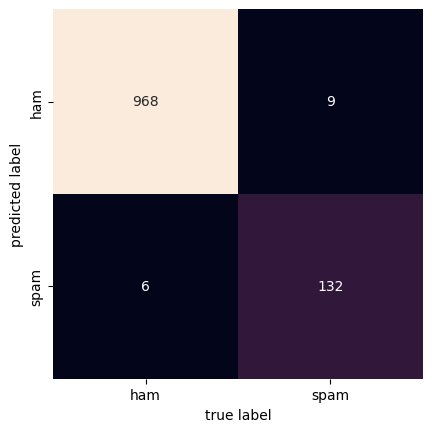

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

print("Confusion Matrix")
mat = confusion_matrix(y_test, test_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=naive_bayes_fit.classes_, yticklabels=naive_bayes_fit.classes_)
plt.xlabel('true label')
plt.ylabel('predicted label');